[View in Colaboratory](https://colab.research.google.com/github/NicknameSoHard/Open_course_ML/blob/master/ML_homework_2.ipynb)

Источник задания: http://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_russian/assignments_demo/assignment02_habr_visual_analysis.ipynb

In [0]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Загружаем файлы:

In [107]:
!wget http://555580.dyn.ufanet.ru/misc/howpop_train.csv -P drive/Open_course_ML

--2018-07-07 14:42:25--  http://555580.dyn.ufanet.ru/misc/howpop_train.csv
Resolving 555580.dyn.ufanet.ru (555580.dyn.ufanet.ru)... 77.79.157.144
Connecting to 555580.dyn.ufanet.ru (555580.dyn.ufanet.ru)|77.79.157.144|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34032627 (32M) [application/octet-stream]
Saving to: ‘drive/Open_course_ML/howpop_train.csv’

howpop_train.csv     40%[=======>            ]  13.03M   305KB/s    eta 67s    

howpop_train.csv    100%[===================>]  32.46M   318KB/s    in 1m 50s  

2018-07-07 14:44:15 (303 KB/s) - ‘drive/Open_course_ML/howpop_train.csv’ saved [34032627/34032627]



In [358]:
data = pd.read_csv('drive/Open_course_ML/howpop_train.csv')
data.head(5).T

,0,1,2,3,4
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/,https://habrahabr.ru/post/18291/,https://geektimes.ru/post/18294/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,geektimes.ru
post_id,18284,18285,18286,18291,18294
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00,2008-01-02 01:32:00,2008-01-02 14:34:00
author,@Tapac,@DezmASter,@DezmASter,@Taoorus,@dennydo
flow,develop,design,design,design,NaN
polling,False,False,False,False,False
content_len,4305,7344,8431,5662,3706
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ...","Сглаживание шрифтов, и субпиксельная отрисовка",Почему мне не нравится iPhone
comments,0,1,47,102,230


Избавимся сразу от переменных, названия которых заканчиваются на _lognorm (нужны для соревнования на Kaggle). Выберем их с помощью filter() и удалим drop-ом:

In [0]:
data.drop(filter(lambda c: c.endswith('_lognorm'), data.columns), 
        axis = 1,       # axis = 1: столбцы 
        inplace = True) # избавляет от необходимости сохранять датасет

In [360]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [361]:
data.describe(include = ['object', 'bool'] # бинарные и категориальные переменные
           ).T

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/post/177215/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [0]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

Столбец published (время публикации) содержит строки. Чтобы мы могли работать с этими данными как с датой/временем публикации, приведём их к типу datetime:

In [363]:
print(data.published.dtype)
data['published'] = pd.to_datetime(data.published, yearfirst = True)
print(data.published.dtype)

object
datetime64[ns]


В каждом пункте предлагается построить картинку и с ее помощью ответить на вопрос в форме. Конечно, можно попытаться ответить на все вопросы только с Pandas, без картинок, но мы советуем Вам потренироваться строить (красивые) визуализации.

In [381]:
data.head(5).T

,0,1,2,3,4
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/,https://habrahabr.ru/post/18291/,https://geektimes.ru/post/18294/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,geektimes.ru
post_id,18284,18285,18286,18291,18294
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00,2008-01-02 01:32:00,2008-01-02 14:34:00
author,@Tapac,@DezmASter,@DezmASter,@Taoorus,@dennydo
flow,develop,design,design,design,NaN
polling,False,False,False,False,False
content_len,4305,7344,8431,5662,3706
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ...","Сглаживание шрифтов, и субпиксельная отрисовка",Почему мне не нравится iPhone
comments,0,1,47,102,230


**1. В каком месяце (и какого года) было больше всего публикаций?**

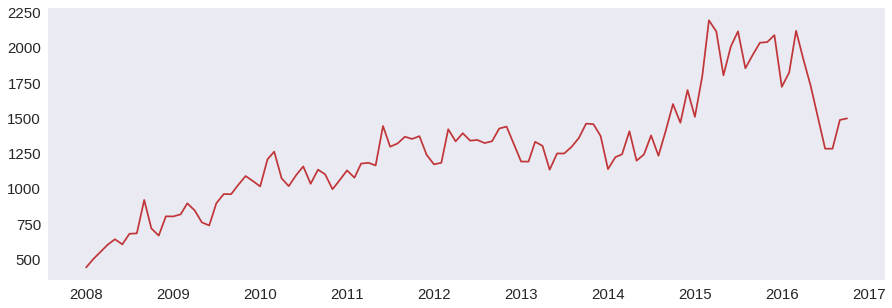

In [365]:
from datetime import date

data['date'] = [date(dt.year, dt.month, 1) for dt in data.published]
data['date'].value_counts().plot()

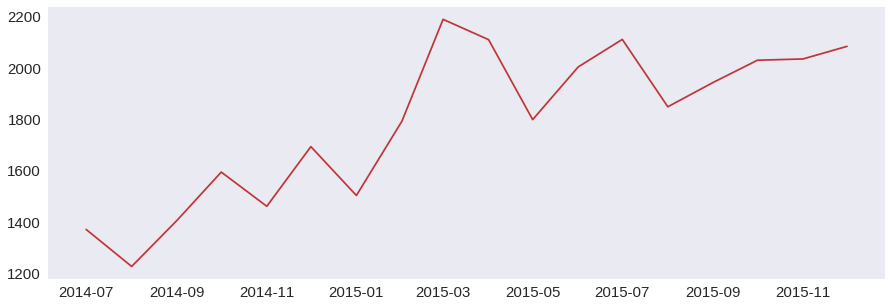

In [385]:
data[(data['date'] > np.datetime64('2014-06-01')) & (data['date'] < np.datetime64('2016-01-01'))]['date'].value_counts().plot()

In [367]:
month_with_max_posts = data['date'].value_counts().index[0]
print('Максимальное кол-во публикаций было ' + str(month_with_max_posts.month) + ' ' + str(month_with_max_posts.year))

Максимальное кол-во публикаций было 3 2015


**2. Проанализируйте публикации в месяце из предыдущего вопроса**

In [0]:
#Создаем отдельные столбики с датой, днем недели и часов публикации
data['day'] = [dt.day for dt in data.published]
data['dayofweek'] = [dt.isoweekday() for dt in data.published]
data['hour'] = [dt.hour for dt in data.published]

#Создаем столбик с меткой на Хабре или Гиктаймс была выложена статья
for name in ['habrahabr', 'geektimes']:
  site_list = []
  for sitename in data.domain:
    if name in sitename:
      response = 1
    else:
      response = 0
    site_list.append(response)
  data[str(name)] = site_list

#По заданию анализировать нужно только месяц, полученный в прошлом задании
data_for_analyse = data[(data['date'] == month_with_max_posts)]

Один или несколько дней сильно выделяются из общей картины?

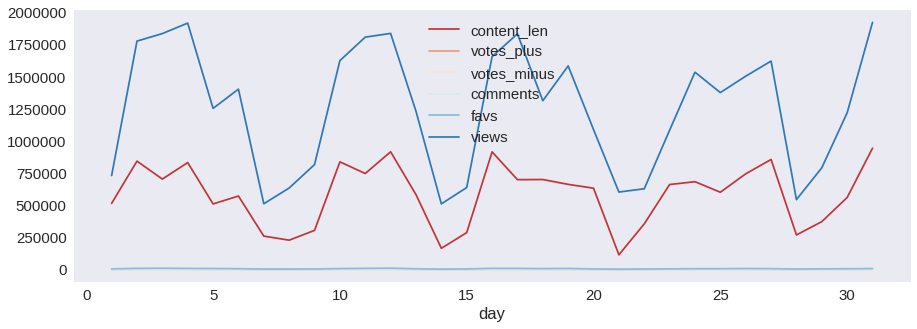

In [386]:
corr_day_data = data_for_analyse[['day'] + ['content_len'] + [votes for votes in data_for_analyse.columns if 'votes' in votes] + ['comments'] + ['favs'] + ['views']]
corr_day_data.groupby('day').sum().plot()

*Я не уверен как интерпретировать результат, но в виде за все время все данные получаются гладкими, а на этом отрезке скачущими, так что, предположу, что это и есть истомые "выделяющиеся из общей картины" данные".*

На хабре всегда больше статей, чем на гиктаймсе?

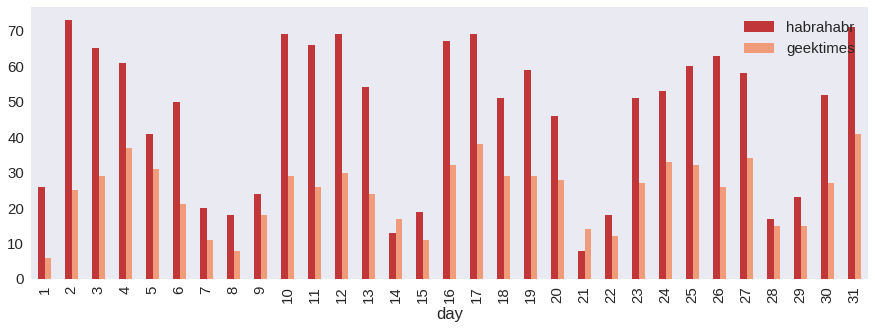

In [387]:
count_posts_data = data_for_analyse[['day'] + ['habrahabr'] + ['geektimes']]
count_posts_data.groupby('day').sum().plot(kind='bar')

По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей?

Text(0.5,1,'Кол-во статей по субботам за все время')

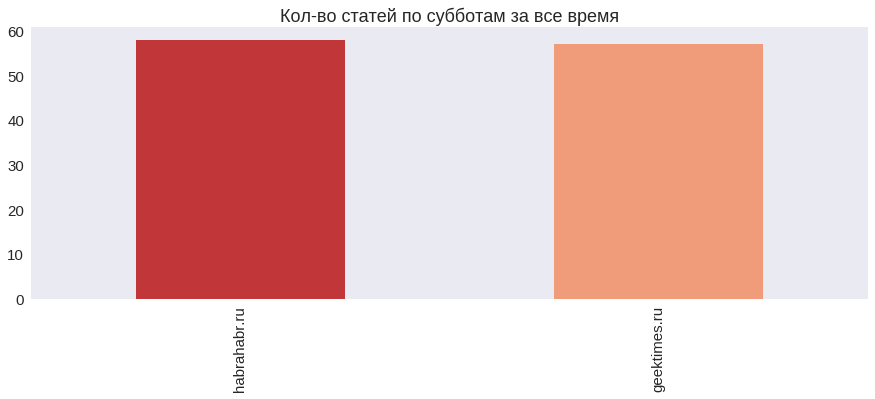

In [394]:
saturday_analyse = data_for_analyse[ (data_for_analyse['dayofweek'] == 6) ]['domain']

saturday_analyse.value_counts().plot(kind='bar')
plt.title('Кол-во статей по субботам за все время')

*Разница всего в пару статей*

*Ошибка. Осознал, что не так решил.*

![alt text](https://pp.userapi.com/c848536/v848536994/211f3/Hft38U1QdA4.jpg) 

**3. Когда лучше всего публиковать статью?**

Больше всего просмотров набирают статьи, опубликованные в 12 часов дня?

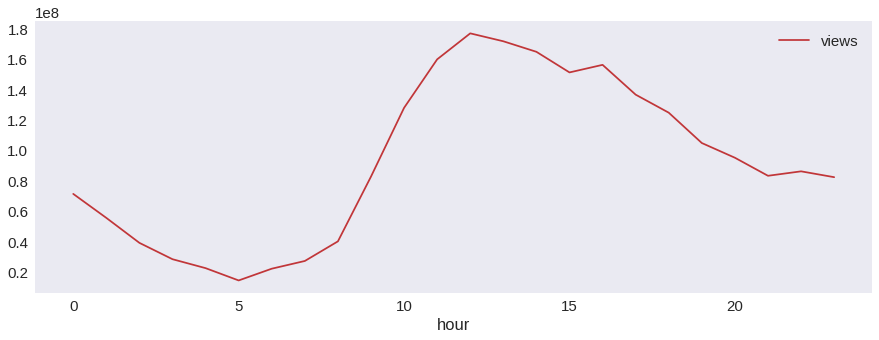

In [389]:
corr_views_and_times = data[['views'] + ['hour']]

corr_views_and_times.groupby('hour').sum().plot()

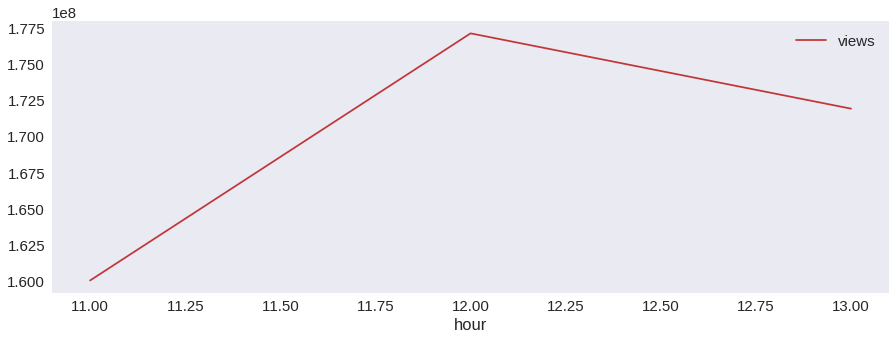

In [373]:
corr_views_and_times[(corr_views_and_times['hour'] > 10) & (corr_views_and_times['hour'] < 14) ].groupby('hour').sum().plot()

*Хорошо видно, что пик приходится ровно на 12 часов. Но на всякий случай проверим остальные.*

У опубликованных в 10 утра постов больше всего комментариев?

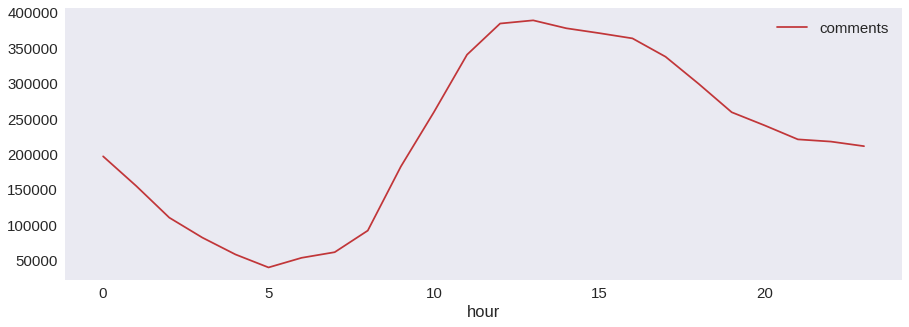

In [374]:
corr_comments_and_times = data[['comments'] + ['hour']]

corr_comments_and_times.groupby('hour').sum().plot()

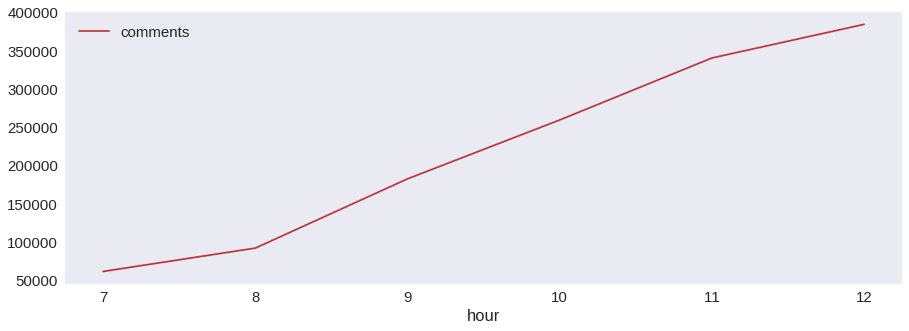

In [375]:
corr_comments_and_times[(corr_comments_and_times['hour'] > 6) & (corr_comments_and_times['hour'] <= 12) ].groupby('hour').sum().plot()

Больше всего просмотров набирают статьи, опубликованные в 6 часов утра?

In [0]:
#См вариант ответа 1

Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера?

In [0]:
#См вариант ответа 2

На хабре дневные статьи комментируют чаще, чем вечерние?

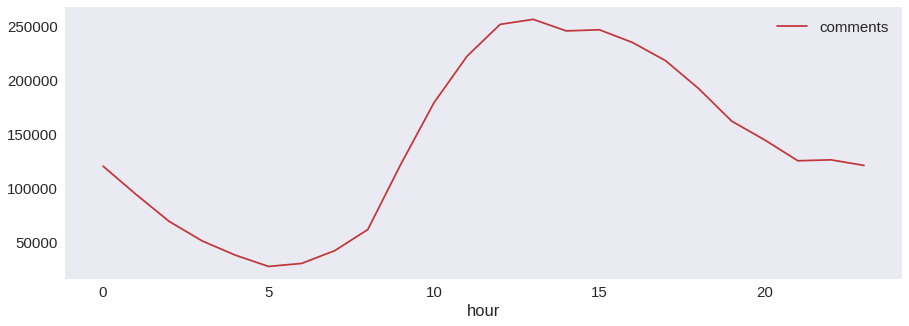

In [402]:
habr_comments = data[(data['habrahabr'] == 1)][['hour'] + ['comments']]
#habr_comments.head(5).T
habr_comments.groupby('hour').sum().plot()

*Тоже очень похоже на правду, но ответ должен быть взаимоисключаюим. Я сделаю ставку на первый вариант.*

Есть ошибки, но не понимаю почему.

![alt text](https://pp.userapi.com/c848536/v848536994/211fb/4cES3TB_pA4.jpg) *italicized text*

**4. Кого из топ-20 авторов чаще всего минусуют?**

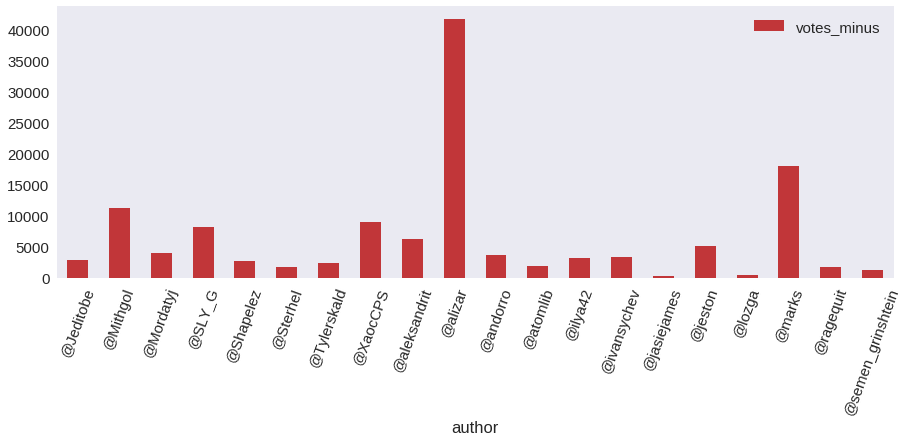

In [411]:
authors_data = data[['author'] + ['votes_minus']]

top_authors = authors_data['author'].value_counts()[:20].index

top_authors_data = authors_data[authors_data['author'].isin(top_authors) ]
top_authors_data.groupby('author').sum().plot(kind='bar', rot=70)

*Тоже не понимаю в чем дело. Верный ответ далеко не в лидерах*

![alt text](https://pp.userapi.com/c848536/v848536272/1cf53/fE_J3GyPSmE.jpg)

**5. Сравните субботы и понедельники**

Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером?

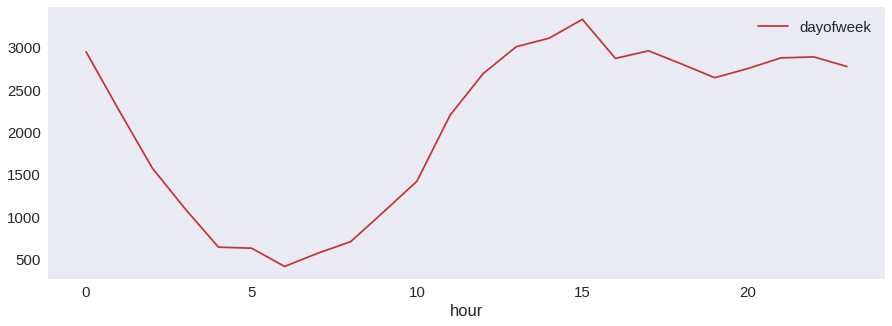

In [379]:
saturday_corr = data[['dayofweek'] + ['hour']][(data['dayofweek'] == 6)]

#sns_plot = sns.pairplot( saturday_corr[['dayofweek','hour']])
saturday_corr.groupby('hour').sum().plot()

*В субботу авторы наиболее активны после 12 часов, что соответствует дню. (Если брать, что день идет с 12 до 18). Хотя и вечером большая активность, но уже поменьше дневной.*

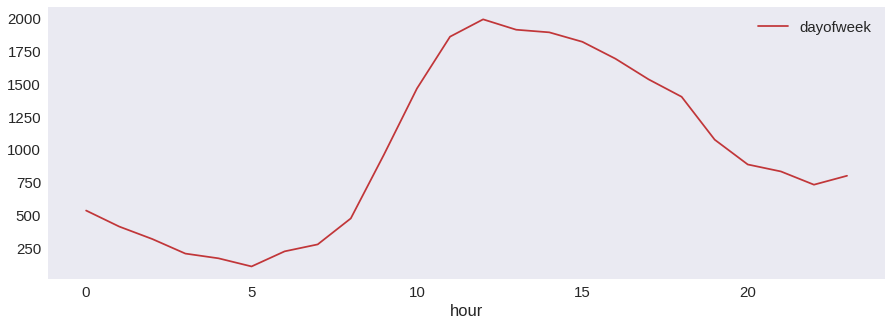

In [380]:
monday_corr = data[['dayofweek'] + ['hour']][(data['dayofweek'] == 1)]
monday_corr.groupby('hour').sum().plot()

*По вечерам ситуация похожа на субботу. Здесь активность пользователей начинается раньше, но основная масса так же происходит днем. К вечеру активность, напротив утверждению, значительно снижается. *

Не пошло дело :C

![alt text](https://pp.userapi.com/c848536/v848536272/1cf77/L2B1ZWTsZS0.jpg)